### data engineering
#### Dataset: SelfRegulationSCP2
#### Author: Edgar Acuna
#### Created:  March 20, 2025

In [2]:
# imports
import numpy as np
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
 

In [3]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y = load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [4]:
# loading Training data
X, y = load_data("SelfRegulationSCP2",split="Train")

 Shape of X =  (200, 7, 1152)
 Shape of y =  (200,)
 New shape of X =  (200, 1152, 7)
 New shape of y =  (200, 2)


In [5]:
#class size in training 
import numpy as np
np.sum(y,axis=0)

array([100, 100])

In [6]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [7]:
X1=X[yo==0]
X2=X[yo==1]

In [8]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
print(Xa2.shape)

(7, 1152)


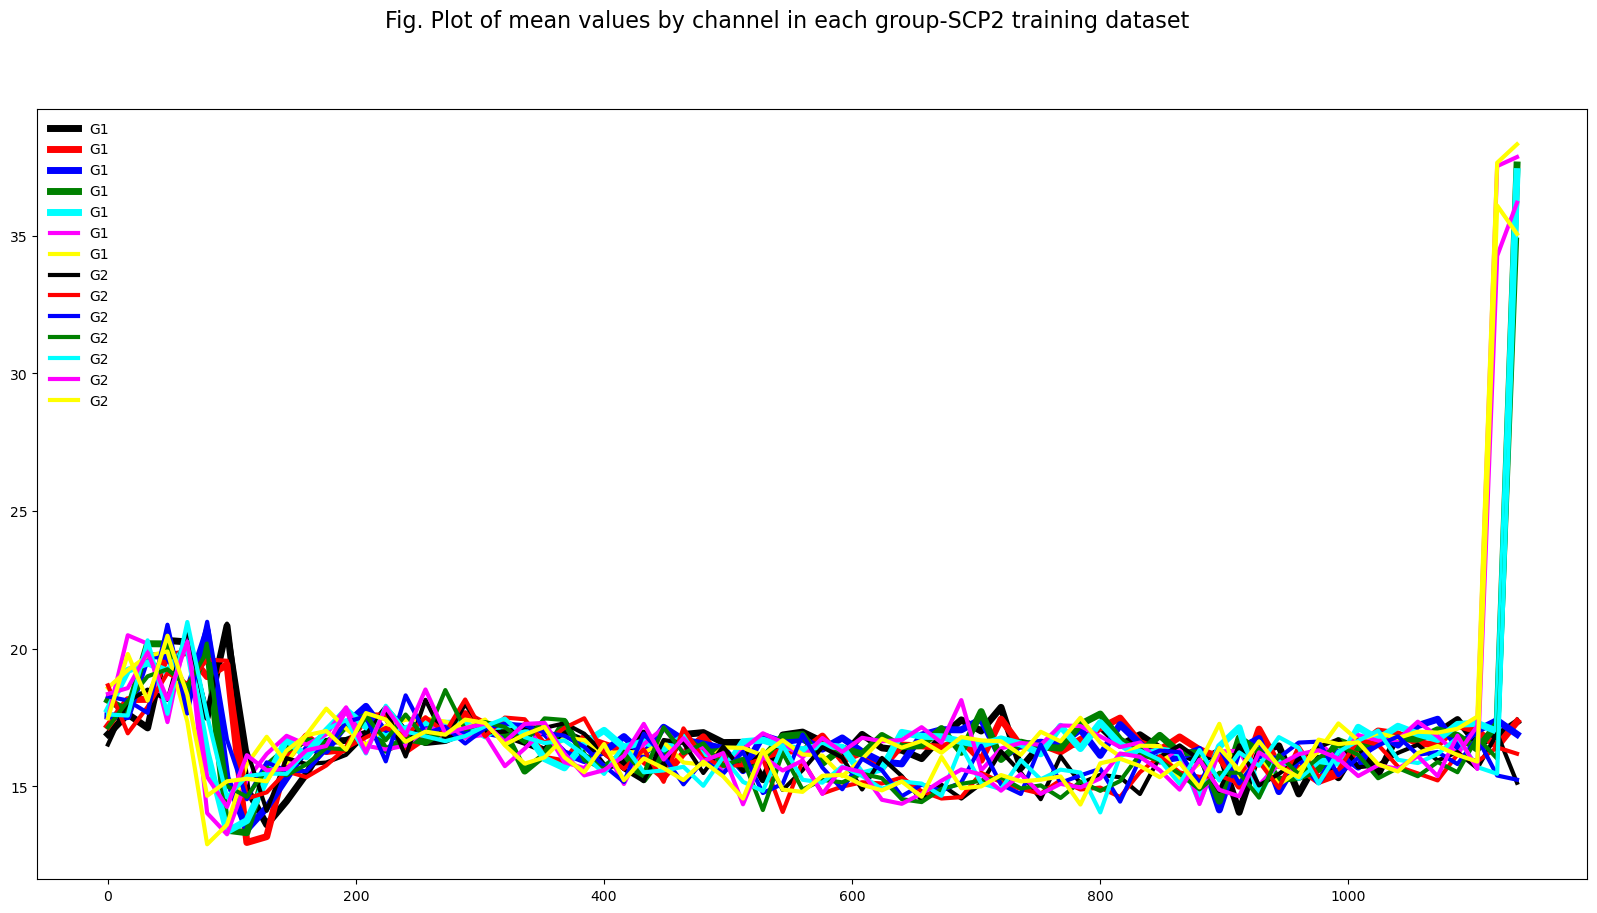

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,1152,16)
fig.suptitle("Fig. Plot of mean values by channel in each group-SCP2 training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='red', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='blue', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[3,ejex], color='green',lw=5,  label='G1')
ax.plot(ejex,Xa1.iloc[4,ejex], color='cyan', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[5,ejex], color='magenta', lw=3,  label='G1')
ax.plot(ejex, Xa1.iloc[6,ejex], color='yellow', lw=3, label='G1')
ax.plot(ejex, Xa2.iloc[0,ejex], color='black',lw=3, label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[3,ejex], color='green',lw=3,  label='G2')
ax.plot(ejex,Xa2.iloc[4,ejex], color='cyan', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[5,ejex], color='magenta', lw=3, label='G2')
ax.plot(ejex, Xa2.iloc[6,ejex], color='yellow', lw=3, label='G2')
ax.legend(loc='best', frameon=False)
plt.show()

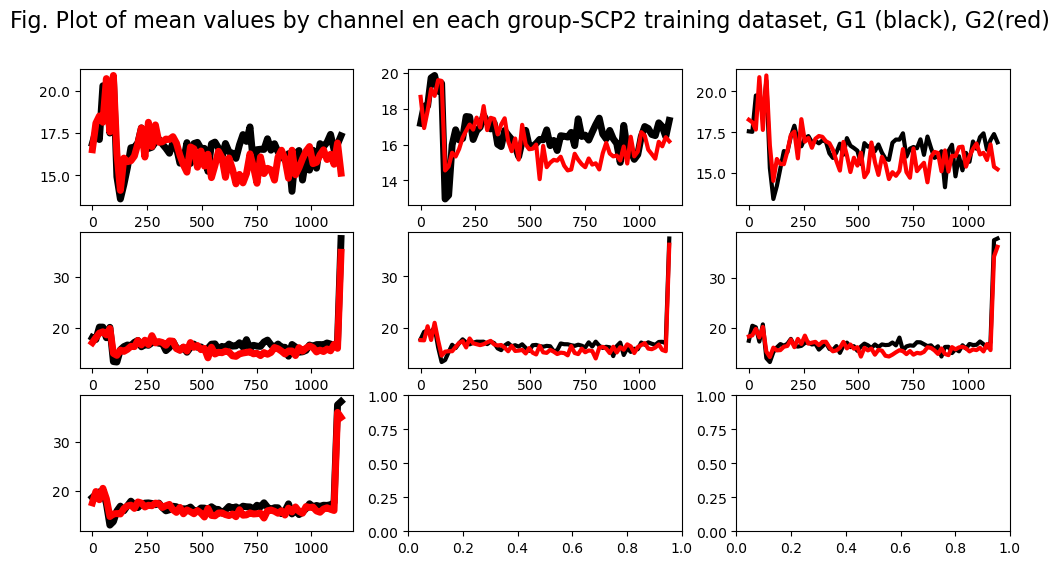

In [10]:
fig, axs = plt.subplots(3, 3,figsize=(12,6))
ejex=np.arange(0,1152,16)
fig.suptitle("Fig. Plot of mean values by channel en each group-SCP2 training dataset, G1 (black), G2(red)",fontsize=16)
axs[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5,  label='G1')
axs[0,0].plot(ejex, Xa2.iloc[0,ejex], color='red',lw=5, label='G2')
axs[0,1].plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5, label='G1')
axs[0,1].plot(ejex, Xa2.iloc[1,ejex], color='red', lw=3, label='G1')
axs[0,2].plot(ejex, Xa1.iloc[2,ejex], color='black',lw=3, label='G1')
axs[0,2].plot(ejex,Xa2.iloc[2,ejex], color='red', lw=3, label='G1')
axs[1,0].plot(ejex, Xa1.iloc[3,ejex], color='black', lw=5,  label='G1')
axs[1,0].plot(ejex, Xa2.iloc[3,ejex], color='red',lw=5, label='G2')
axs[1,1].plot(ejex,Xa1.iloc[4,ejex], color='black', lw=3, label='G2')
axs[1,1].plot(ejex, Xa2.iloc[4,ejex], color='red', lw=3, label='G2')
axs[1,2].plot(ejex, Xa1.iloc[5,ejex], color='black',lw=3,  label='G2')
axs[1,2].plot(ejex,Xa2.iloc[5,ejex], color='red', lw=3, label='G2')
axs[2,0].plot(ejex, Xa1.iloc[6,ejex], color='black', lw=5,  label='G1')
axs[2,0].plot(ejex, Xa2.iloc[6,ejex], color='red',lw=5, label='G2')
#ax.legend(loc='best', frameon=False)
plt.show()

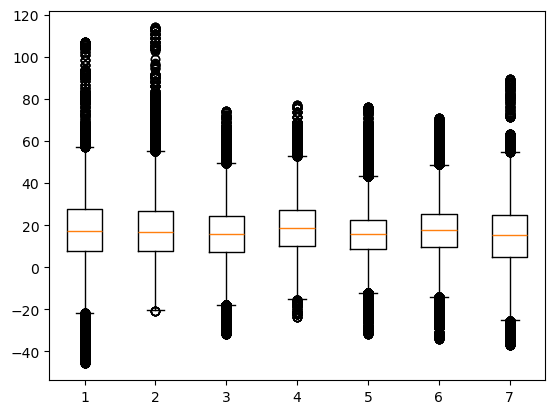

In [11]:
#boxplot of the features in the training set
np.sum(y,axis=0)
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)
pyplot.boxplot(tempotr)
pyplot.show()

### Testing dataset

In [13]:
# loading Testing data
Xt, yt = load_data("SelfRegulationSCP2",split="Test")

 Shape of X =  (180, 7, 1152)
 Shape of y =  (180,)
 New shape of X =  (180, 1152, 7)
 New shape of y =  (180, 2)


In [14]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([90, 90])

In [15]:
a=np.sum(yt,axis=0)
np.max(a/Xt.shape[0])

0.5

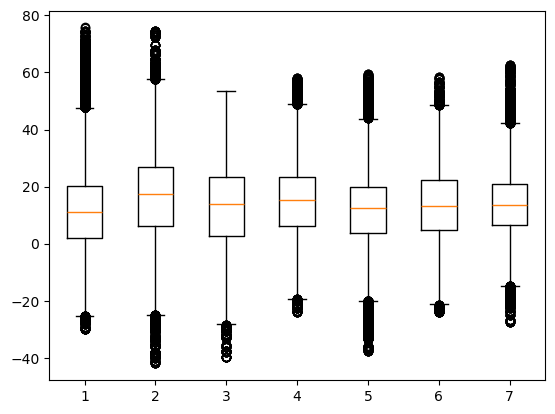

In [16]:
#Boxplot of the features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempote=pd.DataFrame(tempote)
pyplot.boxplot(tempote)
pyplot.show()

In [17]:
tempotr.describe()

,0,1,2,3,4,5,6
count,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000,230400.000000
mean,17.179846,17.891907,15.630276,18.876060,15.420492,17.316194,14.795355
std,15.999143,14.503922,13.432549,12.353666,12.054105,12.836107,15.134387
min,-45.720000,-20.660000,-31.910000,-23.500000,-31.780000,-34.120000,-36.970000
25%,7.910000,7.720000,7.340000,10.190000,8.660000,9.470000,4.750000
50%,17.280000,16.560000,15.910000,18.780000,15.840000,17.560000,15.220000
75%,27.590000,26.620000,24.120000,27.250000,22.500000,25.190000,24.780000
max,107.160000,113.880000,74.250000,76.840000,76.340000,71.030000,89.440000


### The features are not so relevant, since the mean values by group are quite similar. 

In [19]:
tempote.describe()

,0,1,2,3,4,5,6
count,207360.000000,207360.000000,207360.000000,207360.000000,207360.000000,207360.000000,207360.000000
mean,12.048348,16.311692,12.601284,14.699311,11.339917,13.646018,13.532547
std,15.020336,15.591858,14.610360,12.321972,11.901827,12.647696,10.945426
min,-29.910000,-41.910000,-39.590000,-23.940000,-37.560000,-23.940000,-27.310000
25%,2.120000,6.090000,2.690000,6.250000,3.840000,4.910000,6.530000
50%,11.000000,17.310000,13.910000,15.280000,12.380000,13.160000,13.750000
75%,20.380000,26.750000,23.500000,23.310000,19.780000,22.380000,20.840000
max,75.750000,74.410000,53.470000,58.120000,59.590000,58.410000,62.750000


In [20]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [21]:
#Boxplots of each feature in the groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>, <Axes: >,
        <Axes: >]], dtype=object)

In [22]:
temptr.groupby('group').mean()

,0,1,2,3,4,5,6
group,,,,,,,
0,17.119515,17.892598,15.678862,18.853042,15.387492,17.294341,14.784344
1,17.240178,17.891216,15.581690,18.899077,15.453492,17.338047,14.806365


### Distances between groups in training dataset

In [24]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.18131205])

In [25]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(1400, 1152)


In [26]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(1152,)

In [27]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

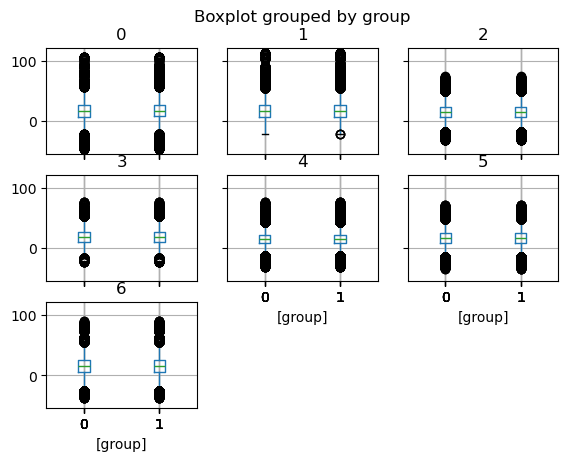

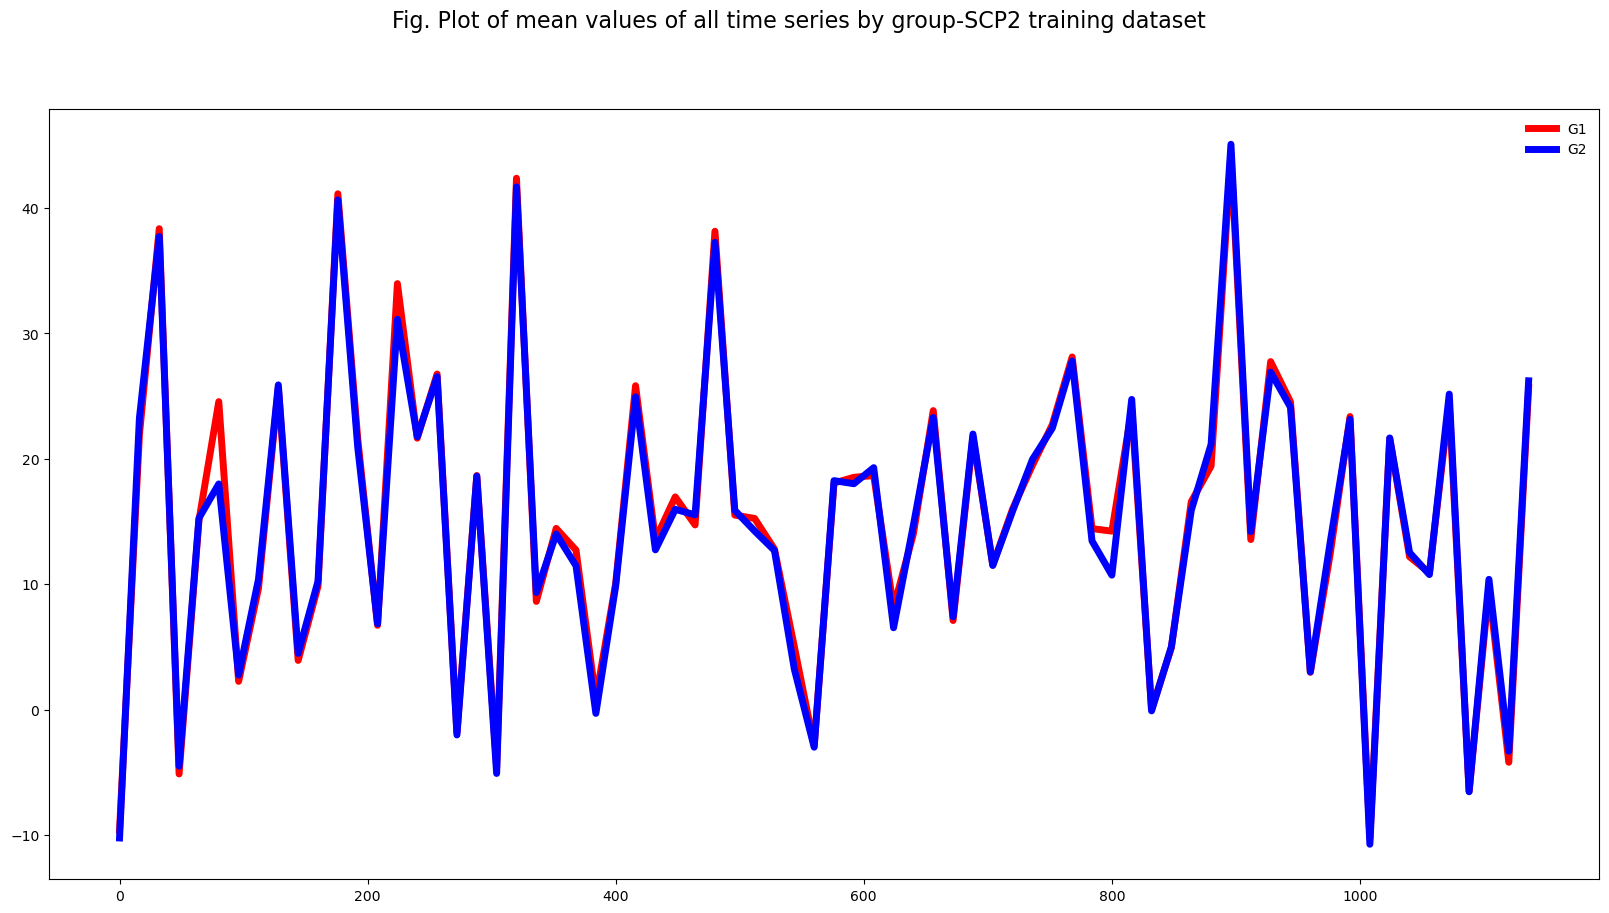

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,1152,16)
fig.suptitle("Fig. Plot of mean values of all time series by group-SCP2 training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='red',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='blue', lw=5, label='G2')
ax.legend(loc='best', frameon=False)
plt.show()

### Feature Selection

In [30]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:1152]
scores = mutual_info_classif(Xm,ym)
#scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/1152

0.0

In [31]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.10
importance=[i for i,v in enumerate(scores) if v > 1]
len(importance)*100/1152

46.614583333333336

In [32]:
tempote.describe()

,0,1,2,3,4,5,6
count,207360.000000,207360.000000,207360.000000,207360.000000,207360.000000,207360.000000,207360.000000
mean,12.048348,16.311692,12.601284,14.699311,11.339917,13.646018,13.532547
std,15.020336,15.591858,14.610360,12.321972,11.901827,12.647696,10.945426
min,-29.910000,-41.910000,-39.590000,-23.940000,-37.560000,-23.940000,-27.310000
25%,2.120000,6.090000,2.690000,6.250000,3.840000,4.910000,6.530000
50%,11.000000,17.310000,13.910000,15.280000,12.380000,13.160000,13.750000
75%,20.380000,26.750000,23.500000,23.310000,19.780000,22.380000,20.840000
max,75.750000,74.410000,53.470000,58.120000,59.590000,58.410000,62.750000


In [33]:
import numpy as np
yot=np.argmax(yt,axis=1)
yot=np.array(yot,dtype=int)

In [34]:
#Boxplots of each feature in the groups pf the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yot)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Bboxplot  of features by class
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>, <Axes: >,
        <Axes: >]], dtype=object)

In [35]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(1260, 1152)


In [36]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(1152,)

In [37]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

572.2144046617022

In [38]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yot)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

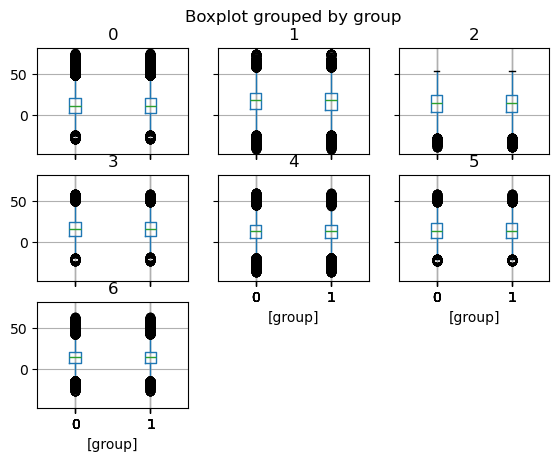

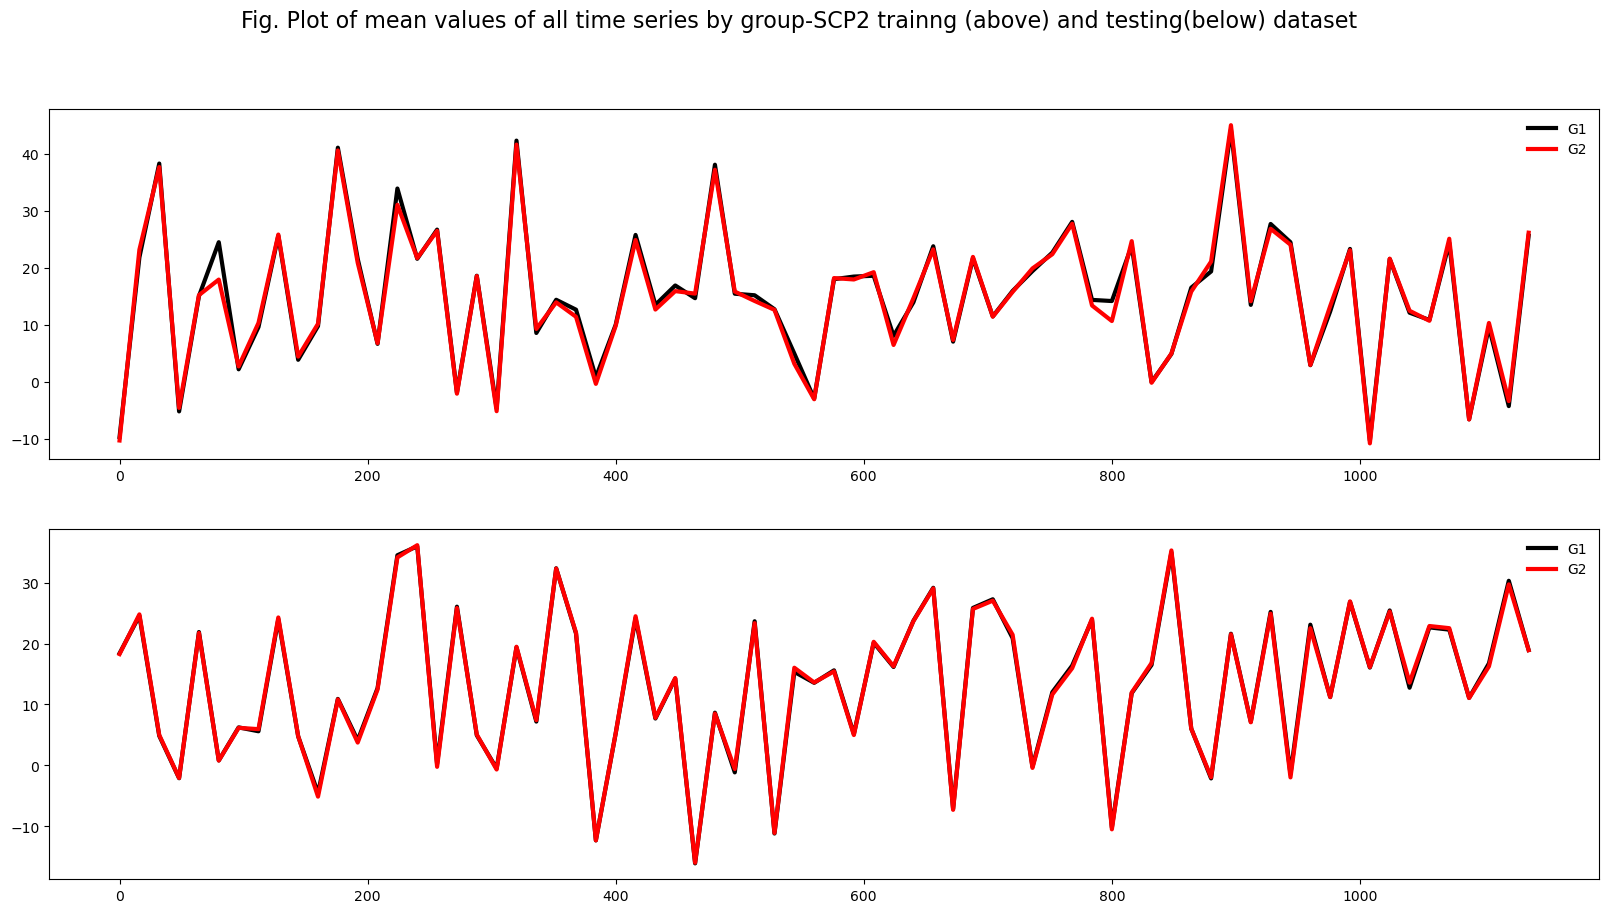

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
ejex=np.arange(0,1152,16)
fig.suptitle("Fig. Plot of mean values of all time series by group-SCP2 trainng (above) and testing(below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=3, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=3, label='G2')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=3, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=3, label='G2')
ax2.legend(loc='best', frameon=False)
plt.show()

### Stationarity

In [41]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[150,0:1152]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.088914
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


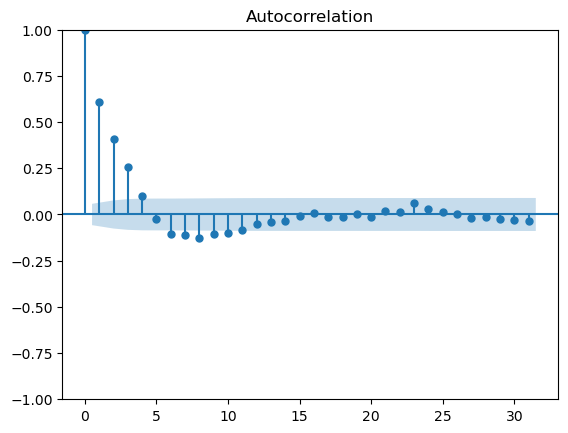

In [42]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)